# Assignment 2

###### We will use Iris Dataset that is mentioned in the Book- Python Machine Learning: Machine Learning and Deep Learning with Python, scikitlearn, and TensorFlow 2, Third Edition, Sebastian Raschka and Vahid Mirjalili, Packt Publishing, 2020. This dataset is introduced in chapter-1 of the book and used in the chapter 2 to train perceptron and adaline models. In chapter 1, it is mentioned at various places and then in chapter 2, it is used to train perceptron on page 30 and adaline on page 45

## An object-oriented perceptron API

In [1]:
import numpy as np
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Reading-in the Iris data

In [2]:
import pandas as pd
df = pd.read_csv('iris.data', header=None, encoding='utf-8')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


<br>

# Implementing Perceptron on 2 linearly seperable species

# Plotting the Iris data of 2 linear seperable species (setosa and versicolor) using 2 features (sepal length and petal length)

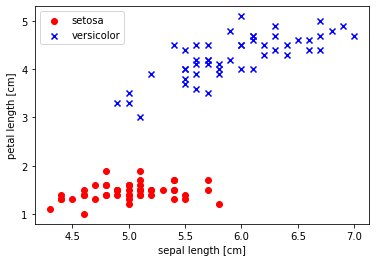

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

### Training the perceptron model using 2 linearly seperable species (setosa and versicolor) using 2 features (sepal length and petal length)

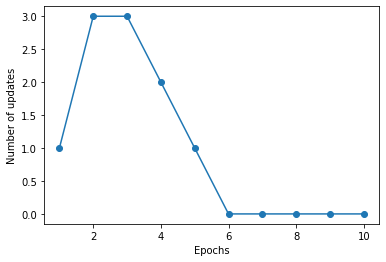

In [4]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

# A function for plotting decision regions in 2D (both for perceptron as well as adaline)

In [5]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

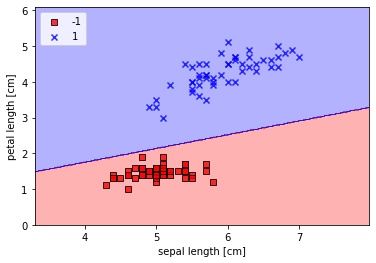

In [6]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

<br>
<br>

# Plotting the Iris data of 2 linear seperable species (setosa and versicolor) using 3 features (sepal length, sepal width, and petal length)

<IPython.core.display.Javascript object>


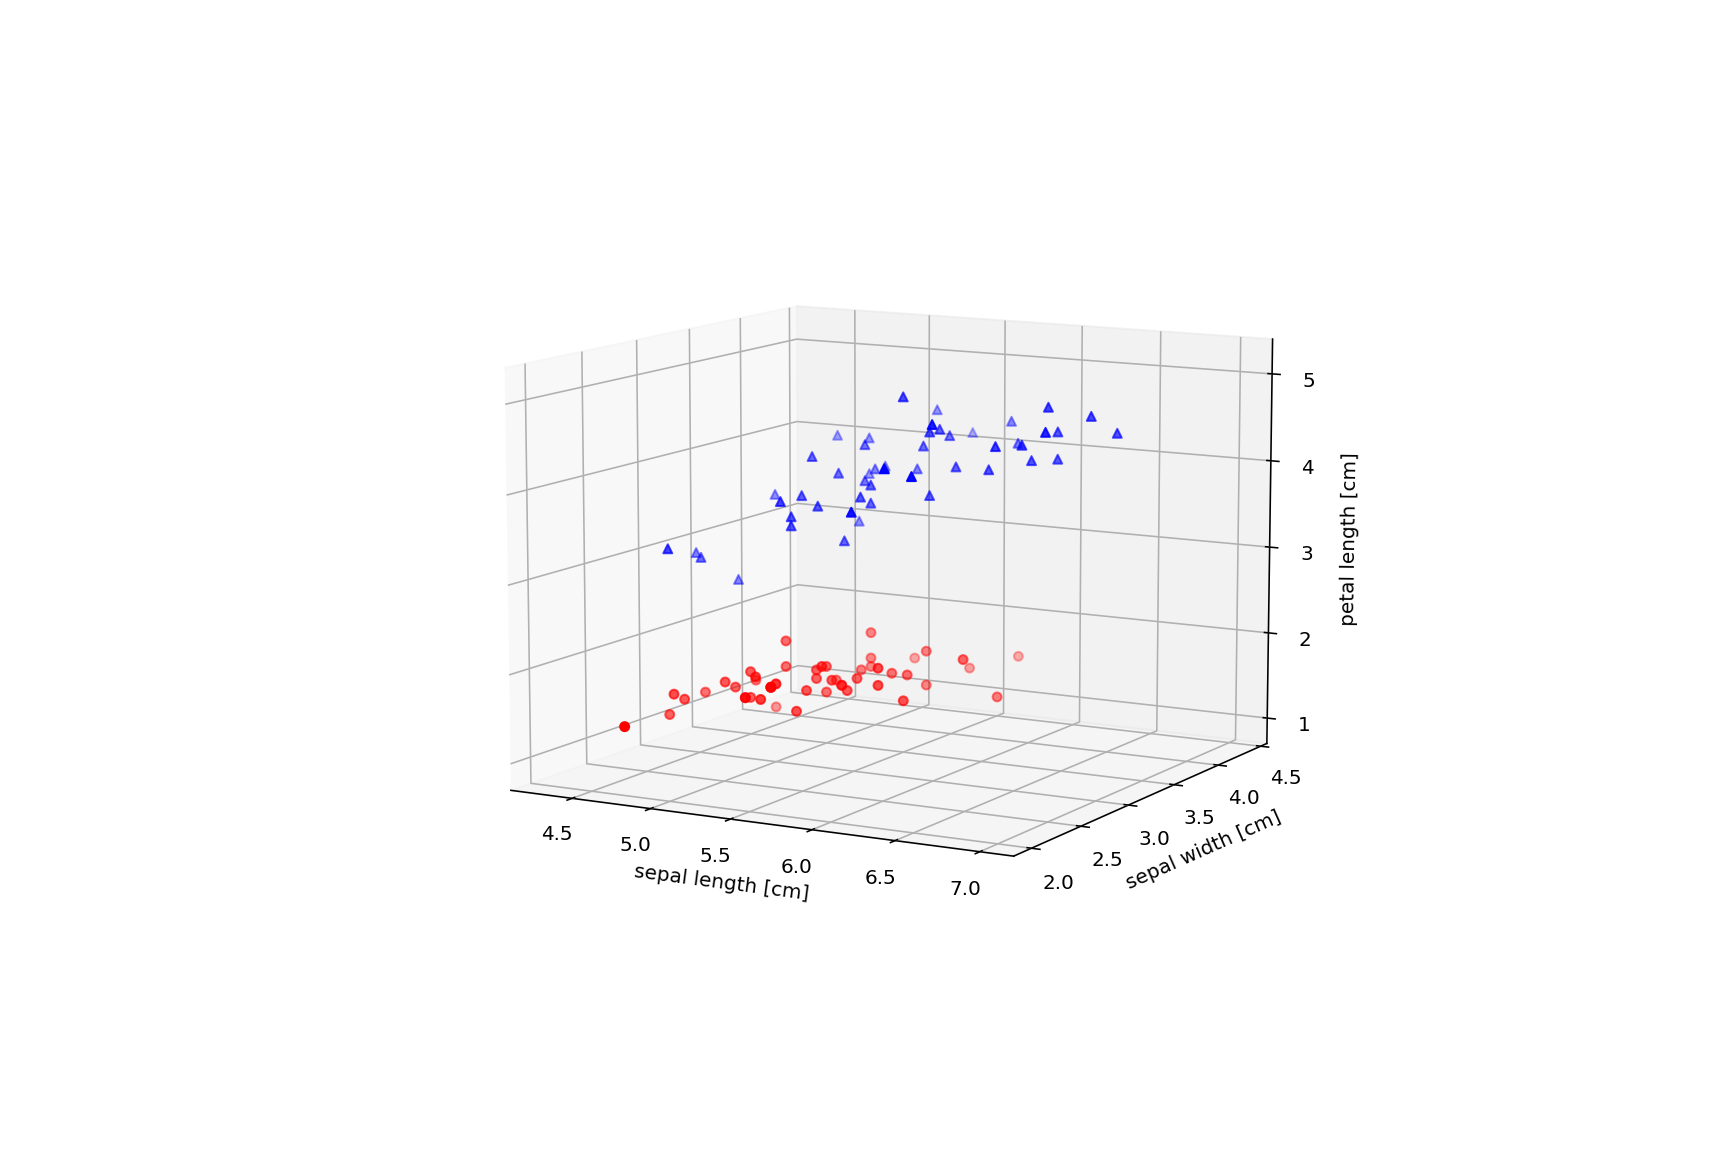

Blue = versicolor 
Red = setosa


In [8]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length, sepal width, and petal length
X = df.iloc[0:100, [0, 1, 2]].values
xval = [X[:50, 0], X[50:100, 0]]
yval = [X[:50, 1], X[50:100, 1]]
zval = [X[:50, 2], X[50:100, 2]]

for c, m in [('r', 'o'), ('b', '^')]:
    if m =='o':
        xs = xval[0]
        ys = yval[0]
        zs = zval[0]
        ax.scatter(xs, ys, zs, c=c, marker=m, label='setosa')
    else:
        xs = xval[1]
        ys = yval[1]
        zs = zval[1]
        ax.scatter(xs, ys, zs, c=c, marker=m, label='versicolor')
ax.set_xlabel('sepal length [cm]')
ax.set_ylabel('sepal width [cm]')
ax.set_zlabel('petal length [cm]')
print("Blue = versicolor \nRed = setosa")
plt.show()

### Training the perceptron model using 2 linearly seperable species (setosa and versicolor) using 3 features (sepal length, sepal width, and petal length)

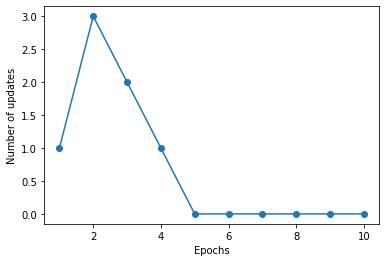

In [9]:
%matplotlib inline
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

# Plotting the Iris data of 2 linear seperable species (setosa and versicolor) using 4 features (sepal length, sepal width, petal length, and petal width)

<IPython.core.display.Javascript object>


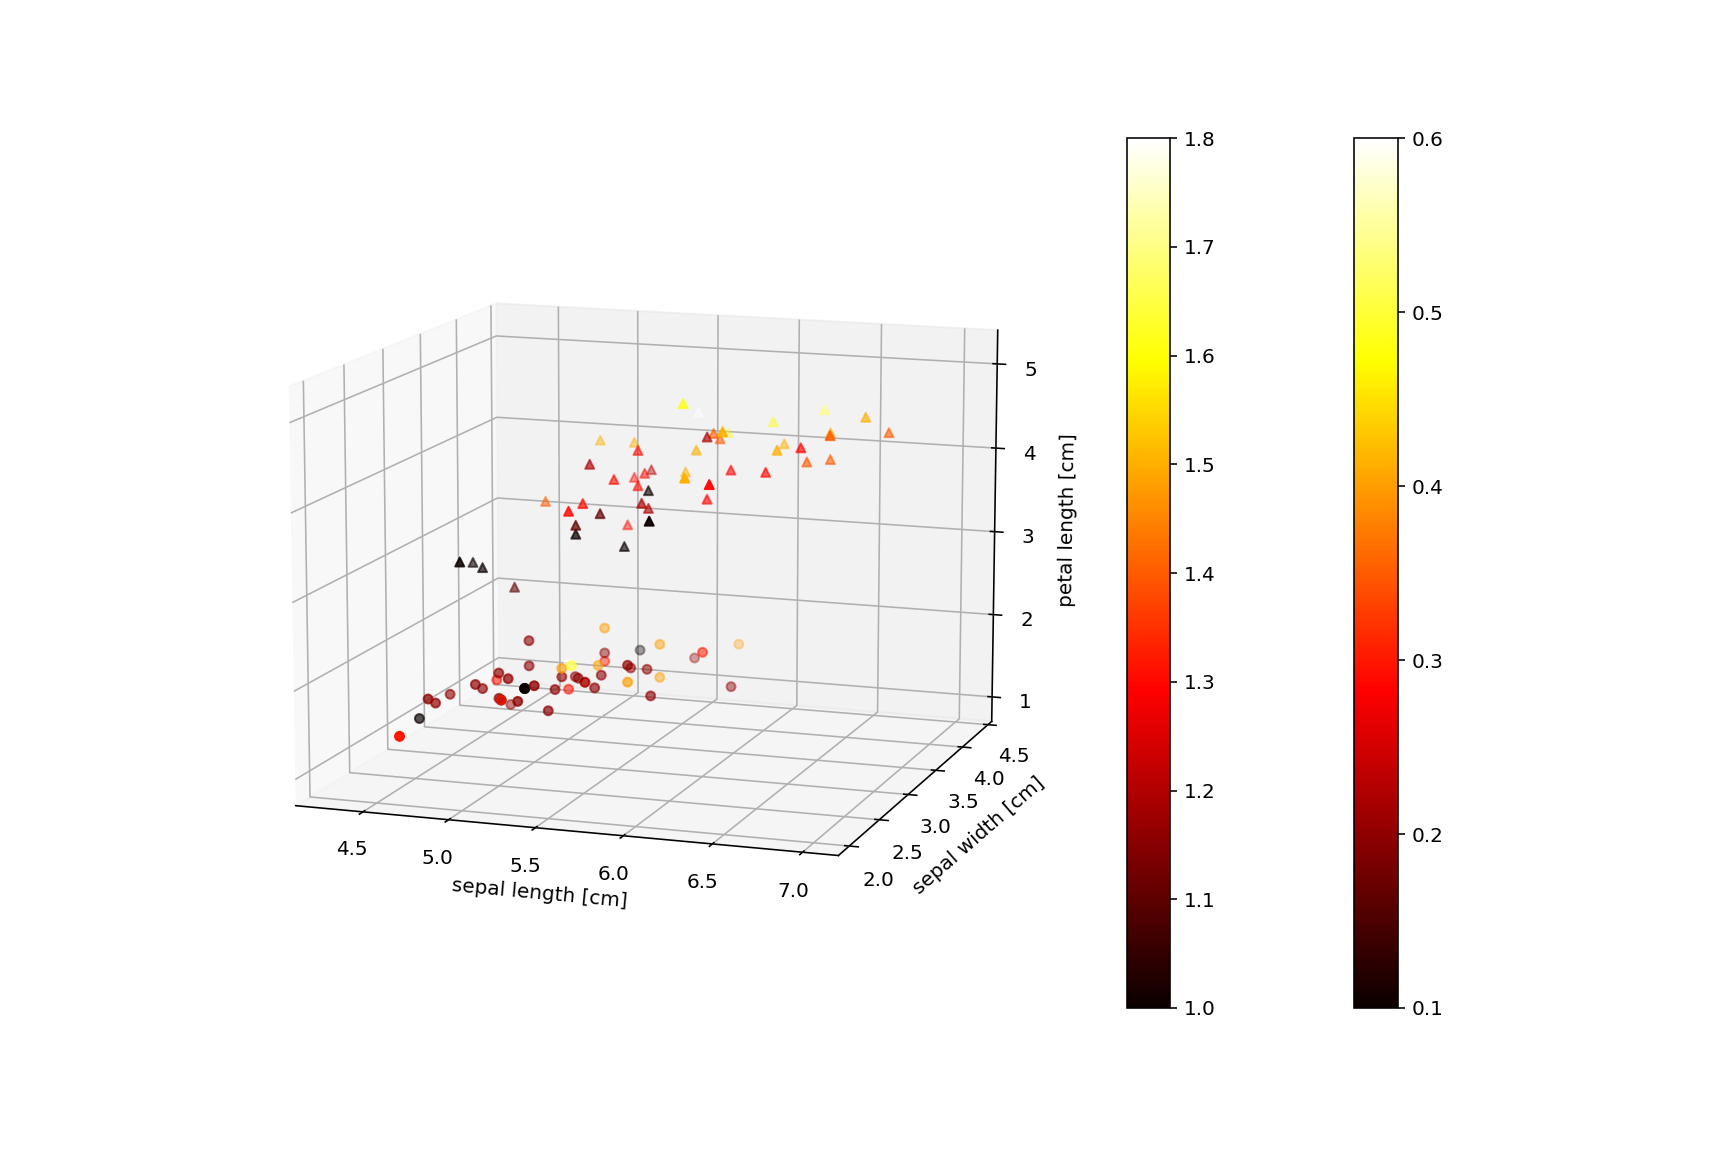

^ = versicolor
o = setosa
colorbar = petal width [cm]
left color bar = versicolor
right color bar = setosa


In [13]:
%matplotlib notebook 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length, sepal width, petal length, and petal width
X = df.iloc[0:100, [0, 1, 2, 3]].values
xval = [X[:50, 0], X[50:100, 0]]
yval = [X[:50, 1], X[50:100, 1]]
zval = [X[:50, 2], X[50:100, 2]]
z2val = [X[:50, 3], X[50:100, 3]]

for c, m in [('r', 'o'), ('b', '^')]:
    if m=='o':
        xs = xval[0]
        ys = yval[0]
        zs = zval[0]
        z2s = z2val[0]
        img = ax.scatter(xs, ys, zs, c=z2s, cmap=plt.hot(), marker=m, label='setosa')
        fig.colorbar(img)
    else:
        xs = xval[1]
        ys = yval[1]
        zs = zval[1]
        z2s = z2val[1]
        img = ax.scatter(xs, ys, zs, c=z2s, cmap=plt.hot(), marker=m, label='versicolor')
        fig.colorbar(img)
ax.set_xlabel('sepal length [cm]')
ax.set_ylabel('sepal width [cm]')
ax.set_zlabel('petal length [cm]')
print("^ = versicolor\no = setosa")
print("colorbar = petal width [cm]")
print("left color bar = versicolor")
print("right color bar = setosa")
plt.show()

### Training the perceptron model using 2 linearly seperable species (setosa and versicolor) using 4 features (sepal length, sepal width, petal length, and petal width)

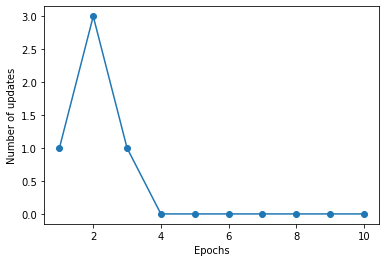

In [14]:
%matplotlib inline
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

# Implementing Perceptron on 2 linearly non-seperable classes

# Plotting the Iris data of 2 linearly non-seperable species (versicolor and virginica) using 2 features (sepal length and petal length)

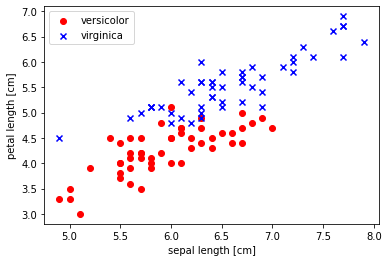

In [15]:
%matplotlib inline

# select versicolor and virginica
y = df.iloc[50:150, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)

# extract sepal length and petal length
X = df.iloc[50:150, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='versicolor')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='virginica')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

### Training the perceptron model using 2 linearly non-seperable species (versicolor and virginica) using 2 features (sepal length and petal length)

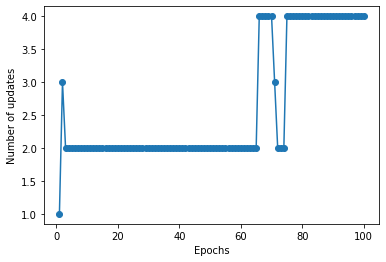

In [16]:
ppn = Perceptron(eta=0.1, n_iter=100)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

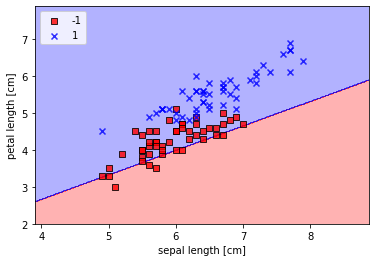

In [17]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

<br>

# Plotting the Iris data of 2 linearly non-seperable species (versicolor and virginica) using 3 features (sepal length, sepal width, and petal length)

<IPython.core.display.Javascript object>


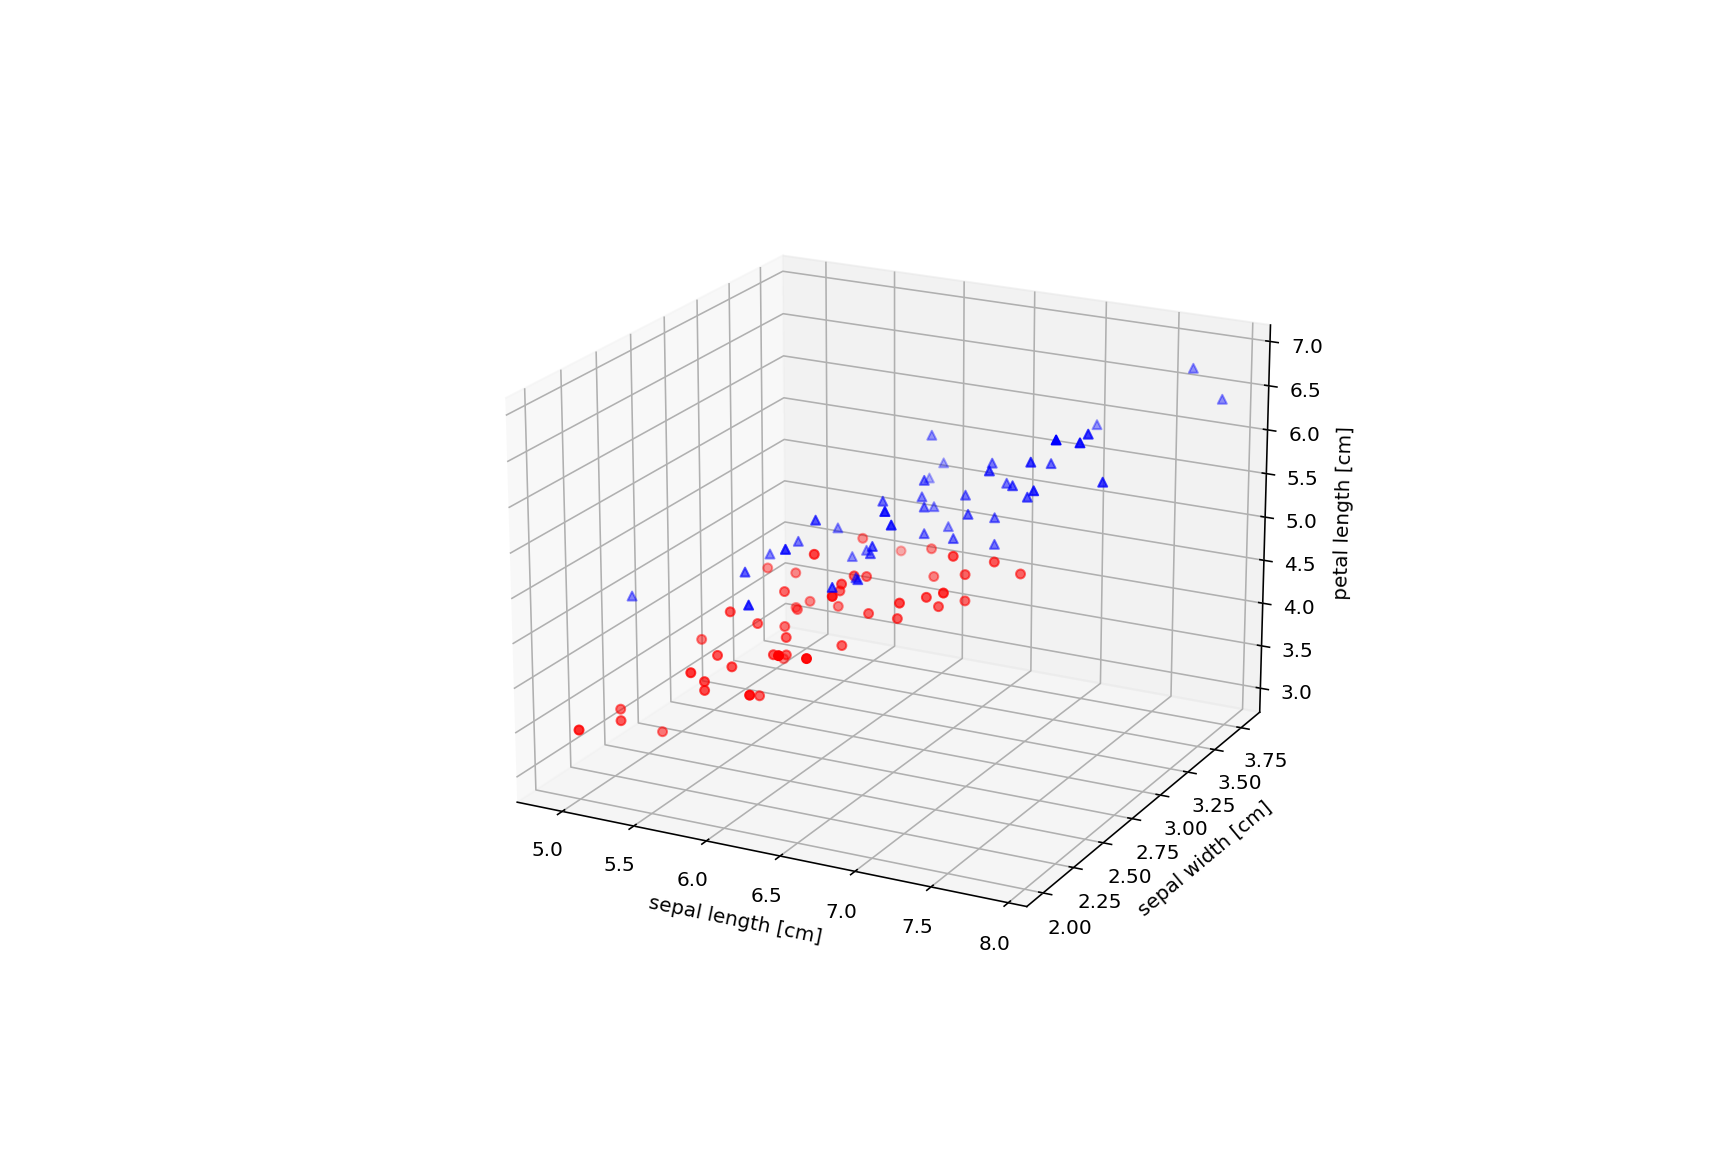

Blue = virginica 
Red = versicolor


In [20]:
%matplotlib notebook 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# select versicolor and virginica
y = df.iloc[50:150, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)

# extract sepal length, sepal width, and petal length
X = df.iloc[50:150, [0, 1, 2]].values
xval = [X[:50, 0], X[50:100, 0]]
yval = [X[:50, 1], X[50:100, 1]]
zval = [X[:50, 2], X[50:100, 2]]

for c, m in [('r', 'o'), ('b', '^')]:
    if m=='o':
        xs = xval[0]
        ys = yval[0]
        zs = zval[0]
        ax.scatter(xs, ys, zs, c=c, marker=m, label='versicolor')
    else:
        xs = xval[1]
        ys = yval[1]
        zs = zval[1]
        ax.scatter(xs, ys, zs, c=c, marker=m, label='virginica')
ax.set_xlabel('sepal length [cm]')
ax.set_ylabel('sepal width [cm]')
ax.set_zlabel('petal length [cm]')
print("Blue = virginica \nRed = versicolor")
plt.show()

### Training the perceptron model using 2 linearly non-seperable species (versicolor and virginica) using 3 features (sepal length, sepal width, and petal length)

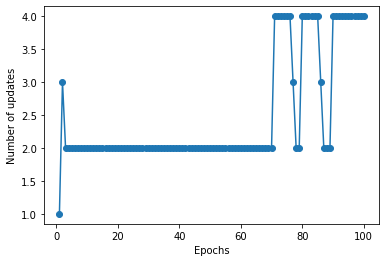

In [21]:
%matplotlib inline
ppn = Perceptron(eta=0.1, n_iter=100)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

# Plotting the Iris data of 2 linearly non-seperable species (versicolor and virginica) using 4 features (sepal length, sepal width, petal length, and petal width)

<IPython.core.display.Javascript object>


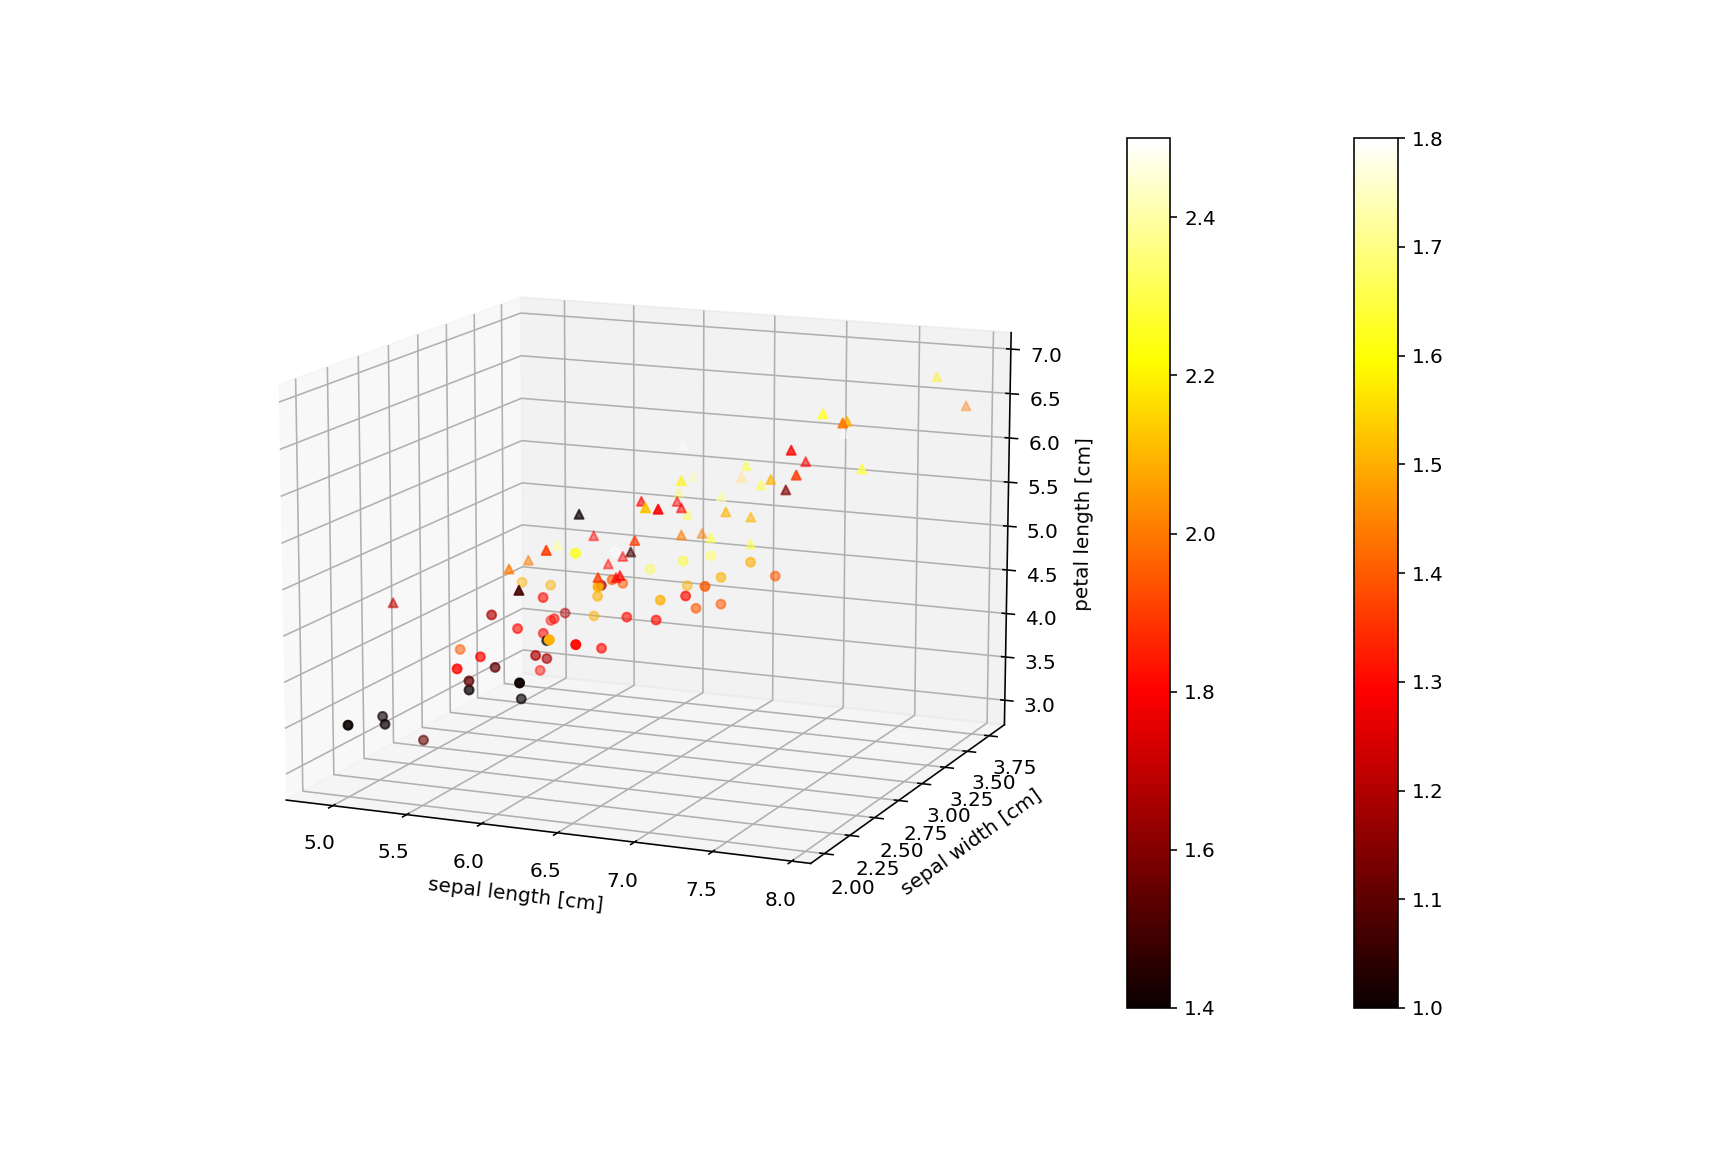

^ = virginica
o = versicolor
colorbar = petal width [cm]
left color bar = vriginica
right color bar = versicolor


In [25]:
%matplotlib notebook 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# select versicolor and virginica
y = df.iloc[50:150, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)

# extract sepal length, sepal width, petal length, and petal width
X = df.iloc[50:150, [0, 1, 2, 3]].values
xval = [X[:50, 0], X[50:100, 0]]
yval = [X[:50, 1], X[50:100, 1]]
zval = [X[:50, 2], X[50:100, 2]]
z2val = [X[:50, 3], X[50:100, 3]]

for c, m in [('r', 'o'), ('b', '^')]:
    if m=='o':
        xs = xval[0]
        ys = yval[0]
        zs = zval[0]
        z2s = z2val[0]
        img = ax.scatter(xs, ys, zs, c=z2s, cmap=plt.hot(), marker=m, label='versicolor')
        fig.colorbar(img)
    else:
        xs = xval[1]
        ys = yval[1]
        zs = zval[1]
        z2s = z2val[1]
        img = ax.scatter(xs, ys, zs, c=z2s, cmap=plt.hot(), marker=m, label='virginica')
        fig.colorbar(img)
ax.set_xlabel('sepal length [cm]')
ax.set_ylabel('sepal width [cm]')
ax.set_zlabel('petal length [cm]')
print("^ = virginica\no = versicolor")
print("colorbar = petal width [cm]")
print("left color bar = vriginica")
print("right color bar = versicolor")
plt.show()

### Training the perceptron model using 2 linearly non-seperable species (versicolor and virginica) using 4 features (sepal length, sepal width, petal length, and petal width)

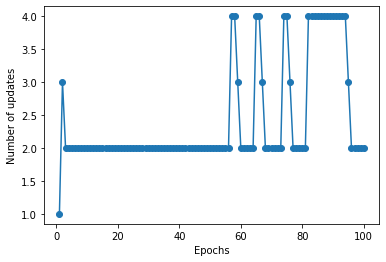

In [26]:
%matplotlib inline
ppn = Perceptron(eta=0.1, n_iter=100)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

<br>
<hr>
<hr>
<hr>
<hr>
<br>

## An object-oriented Adaline Batch Gradient Descent API

In [27]:
import numpy as np
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

# Implementing Adaline on 2 linearly seperable species

# Plotting the Iris data of 2 linear seperable species (setosa and versicolor) using 2 features (sepal length and petal length)

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv('iris.data', header=None, encoding='utf-8')
X = df.iloc[0:100, [0, 2]].values
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

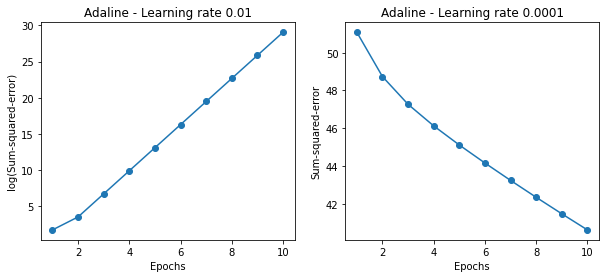

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada.cost_) + 1), np.log10(ada.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

## Improving gradient descent through feature scaling

In [30]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

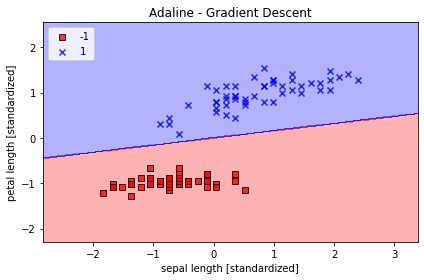

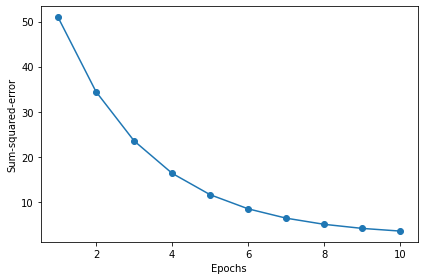

In [31]:
ada_gd = AdalineGD(n_iter=10, eta=0.01)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()

# Plotting the Iris data of 2 linear seperable species (setosa and versicolor) using 3 features (sepal length, sepal width, and petal length)

<IPython.core.display.Javascript object>


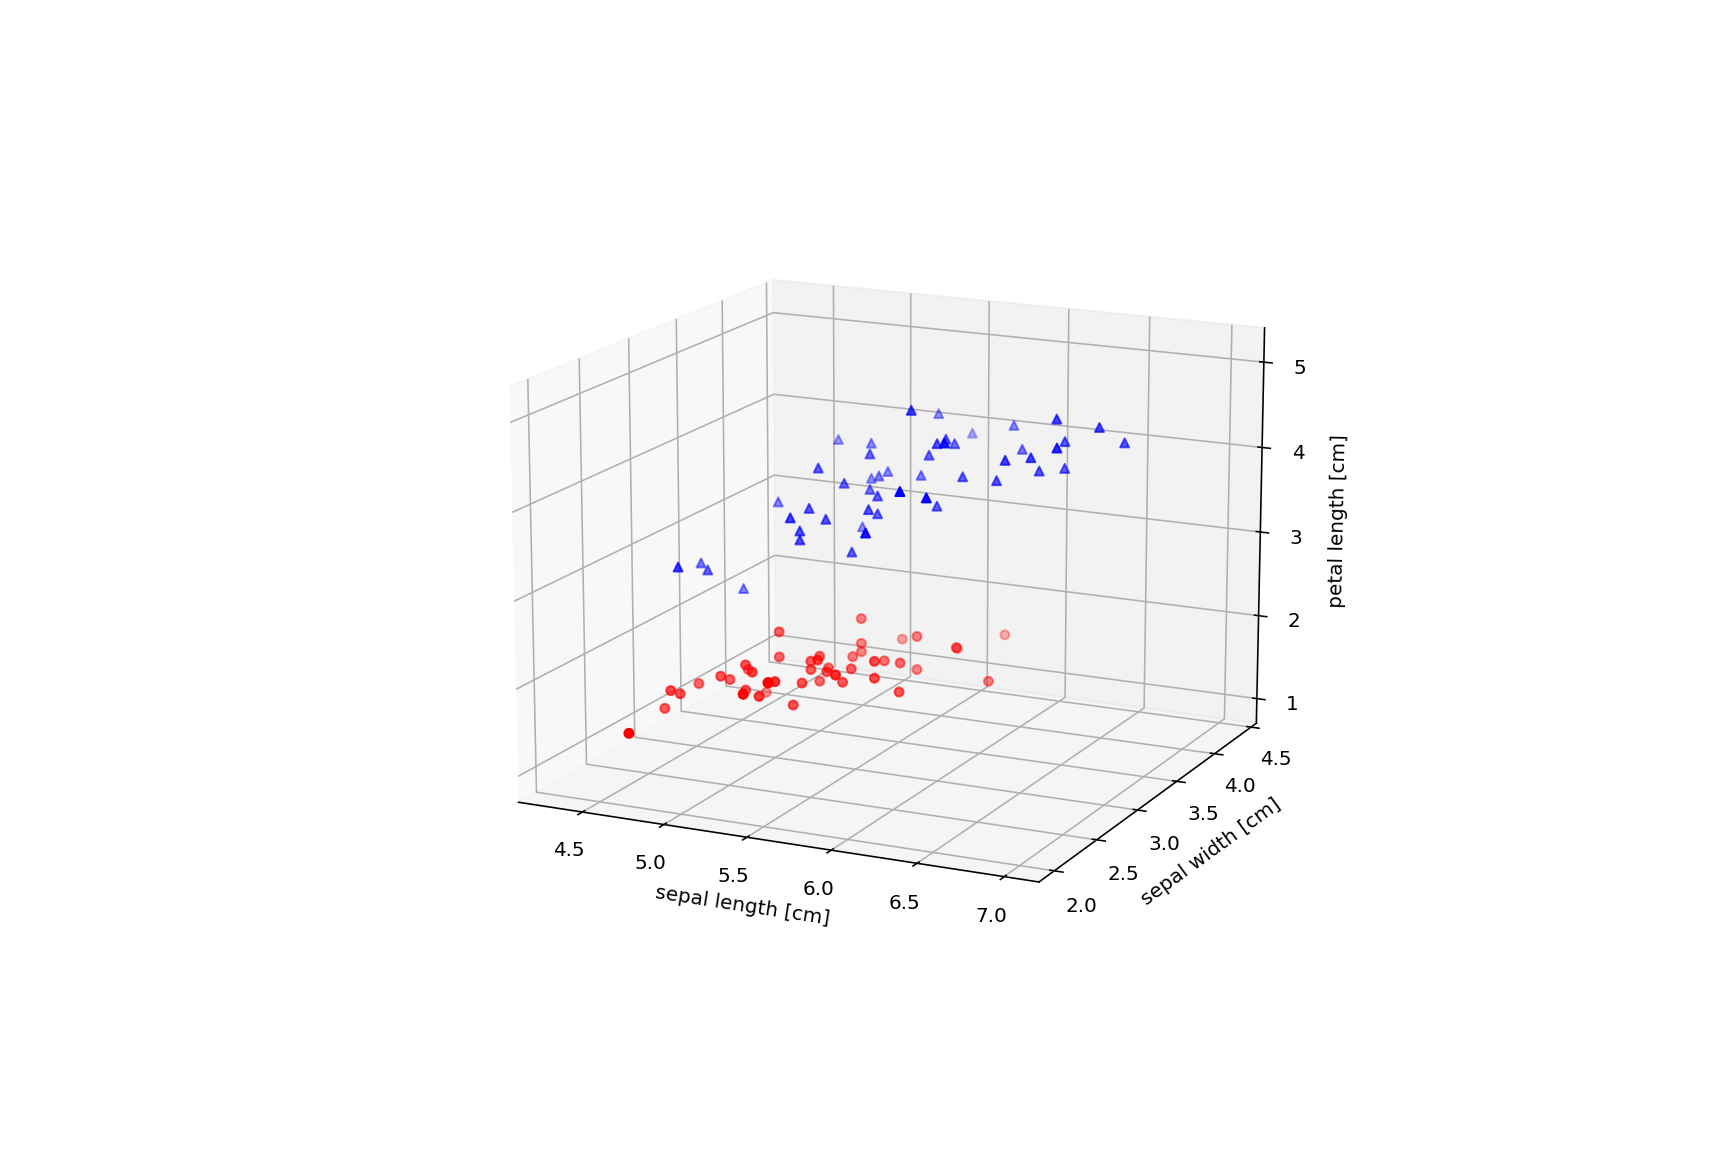

Blue = versicolor 
Red = setosa


In [33]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length, sepal width, and petal length
X = df.iloc[0:100, [0, 1, 2]].values
xval = [X[:50, 0], X[50:100, 0]]
yval = [X[:50, 1], X[50:100, 1]]
zval = [X[:50, 2], X[50:100, 2]]

for c, m in [('r', 'o'), ('b', '^')]:
    if m=='o':
        xs = xval[0]
        ys = yval[0]
        zs = zval[0]
        ax.scatter(xs, ys, zs, c=c, marker=m)
    else:
        xs = xval[1]
        ys = yval[1]
        zs = zval[1]
        ax.scatter(xs, ys, zs, c=c, marker=m)
ax.set_xlabel('sepal length [cm]')
ax.set_ylabel('sepal width [cm]')
ax.set_zlabel('petal length [cm]')
print("Blue = versicolor \nRed = setosa")
plt.show()

# Improving gradient descent through feature scaling

In [35]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
X_std[:, 2] = (X[:, 2] - X[:, 2].mean()) / X[:, 2].std()

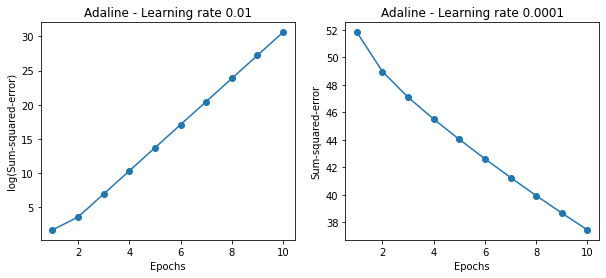

In [36]:
%matplotlib inline
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada.cost_) + 1), np.log10(ada.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

# Plotting the Iris data of 2 linearly seperable species (setosa and versicolor) using 4 features (sepal length, sepal width, petal length, and petal width)

<IPython.core.display.Javascript object>


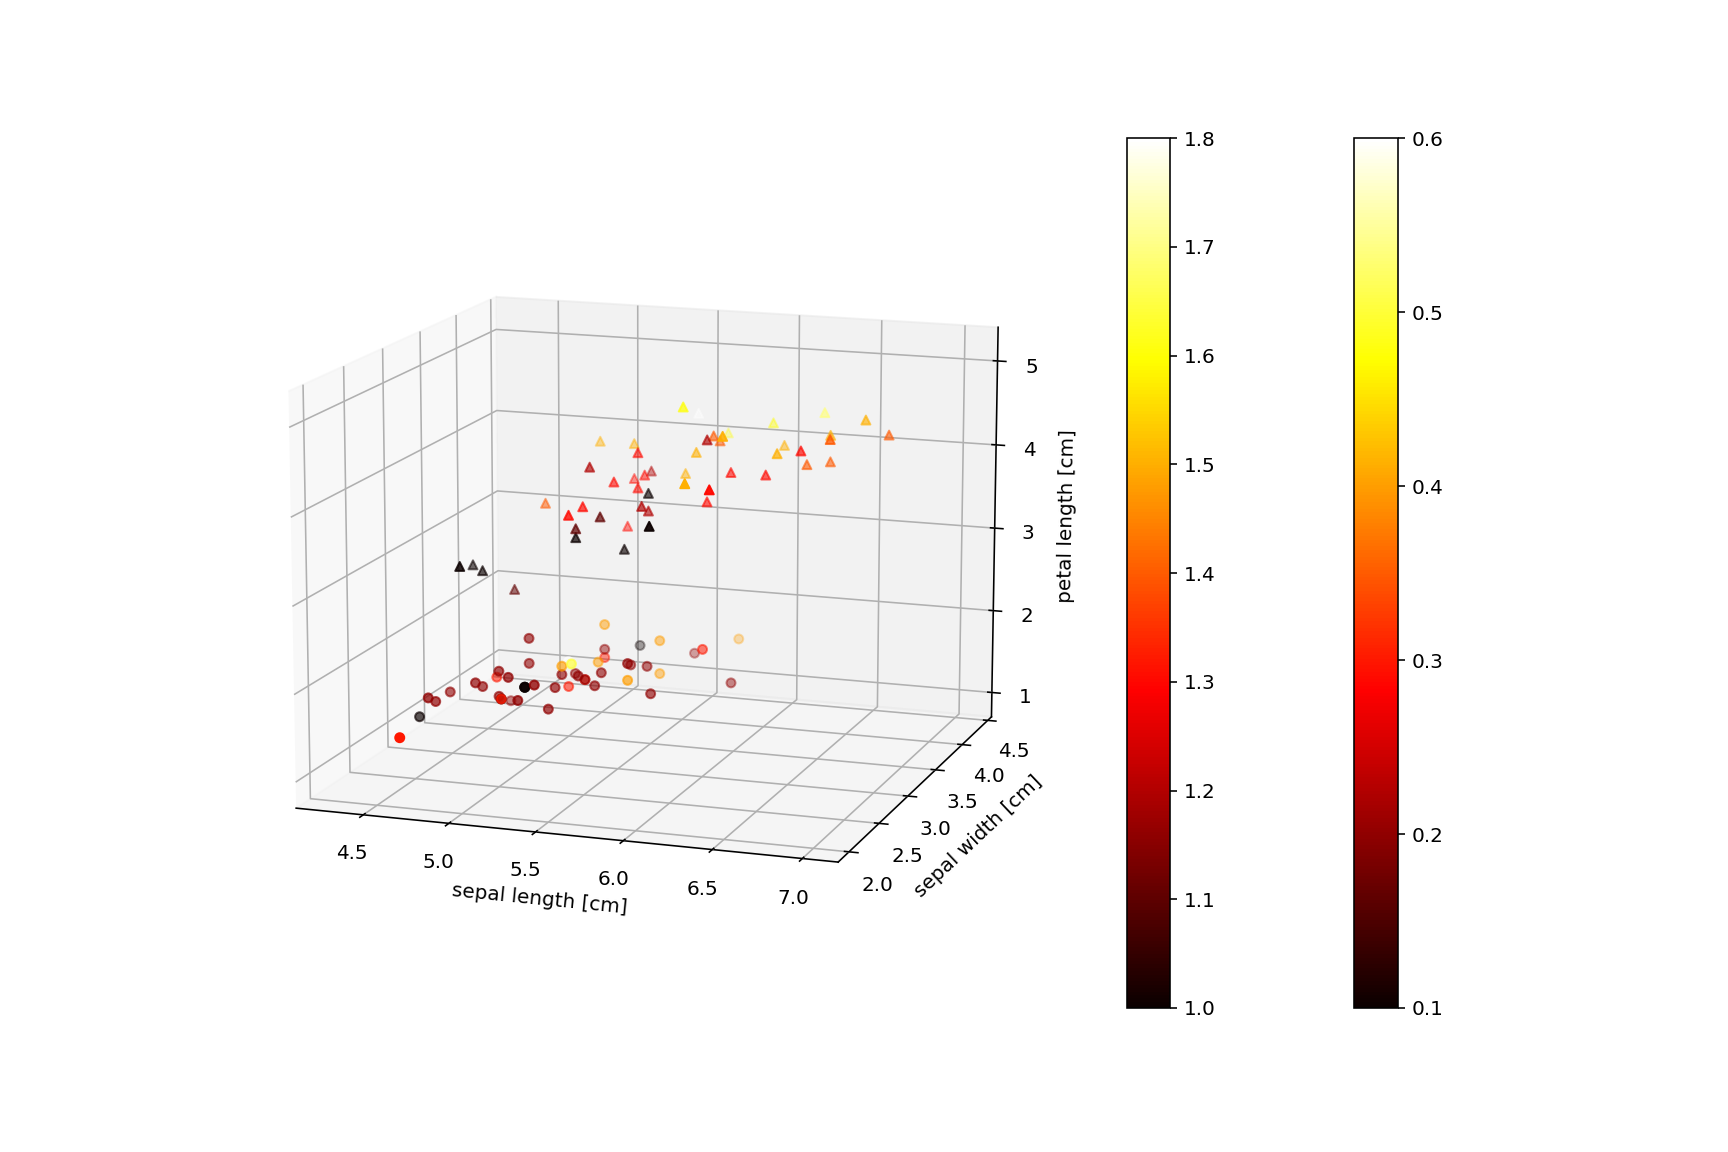

^ = versicolor
o = setosa
colorbar = petal width [cm]
left color bar = versicolor
right color bar = setosa


In [38]:
%matplotlib notebook  
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length, sepal width, petal length, and petal width
X = df.iloc[0:100, [0, 1, 2, 3]].values
xval = [X[:50, 0], X[50:100, 0]]
yval = [X[:50, 1], X[50:100, 1]]
zval = [X[:50, 2], X[50:100, 2]]
z2val = [X[:50, 3], X[50:100, 3]]

for c, m in [('r', 'o'), ('b', '^')]:
    if m=='o':
        xs = xval[0]
        ys = yval[0]
        zs = zval[0]
        z2s = z2val[0]
        img = ax.scatter(xs, ys, zs, c=z2s, cmap=plt.hot(), marker=m, label='setosa')
        fig.colorbar(img)
    else:
        xs = xval[1]
        ys = yval[1]
        zs = zval[1]
        z2s = z2val[1]
        img = ax.scatter(xs, ys, zs, c=z2s, cmap=plt.hot(), marker=m, label='versicolor')
        fig.colorbar(img)
ax.set_xlabel('sepal length [cm]')
ax.set_ylabel('sepal width [cm]')
ax.set_zlabel('petal length [cm]')
print("^ = versicolor\no = setosa")
print("colorbar = petal width [cm]")
print("left color bar = versicolor")
print("right color bar = setosa")
plt.show()

# Improving gradient descent through feature scaling

In [39]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
X_std[:, 2] = (X[:, 2] - X[:, 2].mean()) / X[:, 2].std()
X_std[:, 3] = (X[:, 3] - X[:, 3].mean()) / X[:, 3].std()

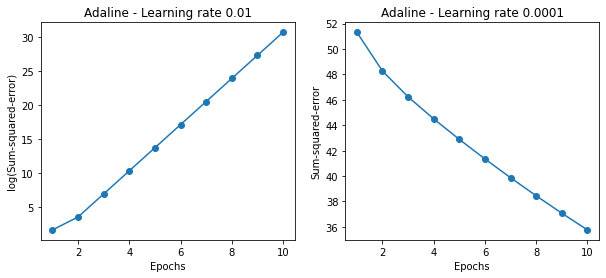

In [40]:
%matplotlib inline
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada.cost_) + 1), np.log10(ada.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

# Implementing Adaline on 2 linearly non-seperable classes

# Plotting the Iris data of 2 linearly non-seperable species (versicolor and virginica) using 2 features (sepal length and petal length)

In [41]:
%matplotlib inline
df = pd.read_csv('iris.data', header=None, encoding='utf-8')
X = df.iloc[50:150, [0, 2]].values
y = df.iloc[50:150, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)

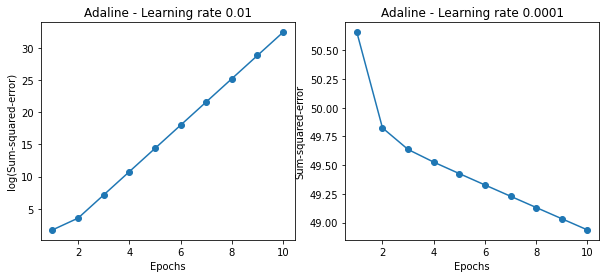

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada.cost_) + 1), np.log10(ada.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

## Improving gradient descent through feature scaling

In [43]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

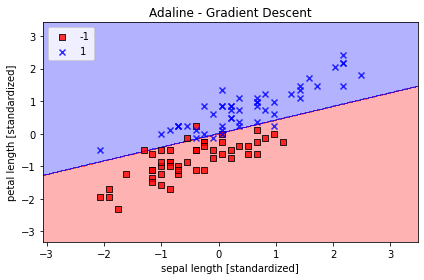

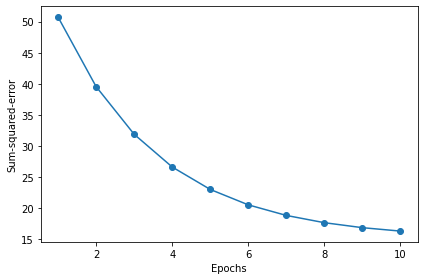

In [44]:
ada_gd = AdalineGD(n_iter=10, eta=0.01)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()

# Plotting the Iris data of 2 linearly non-seperable species (versicolor and virginica) using 3 features (sepal length, sepal width, and petal length)

<IPython.core.display.Javascript object>


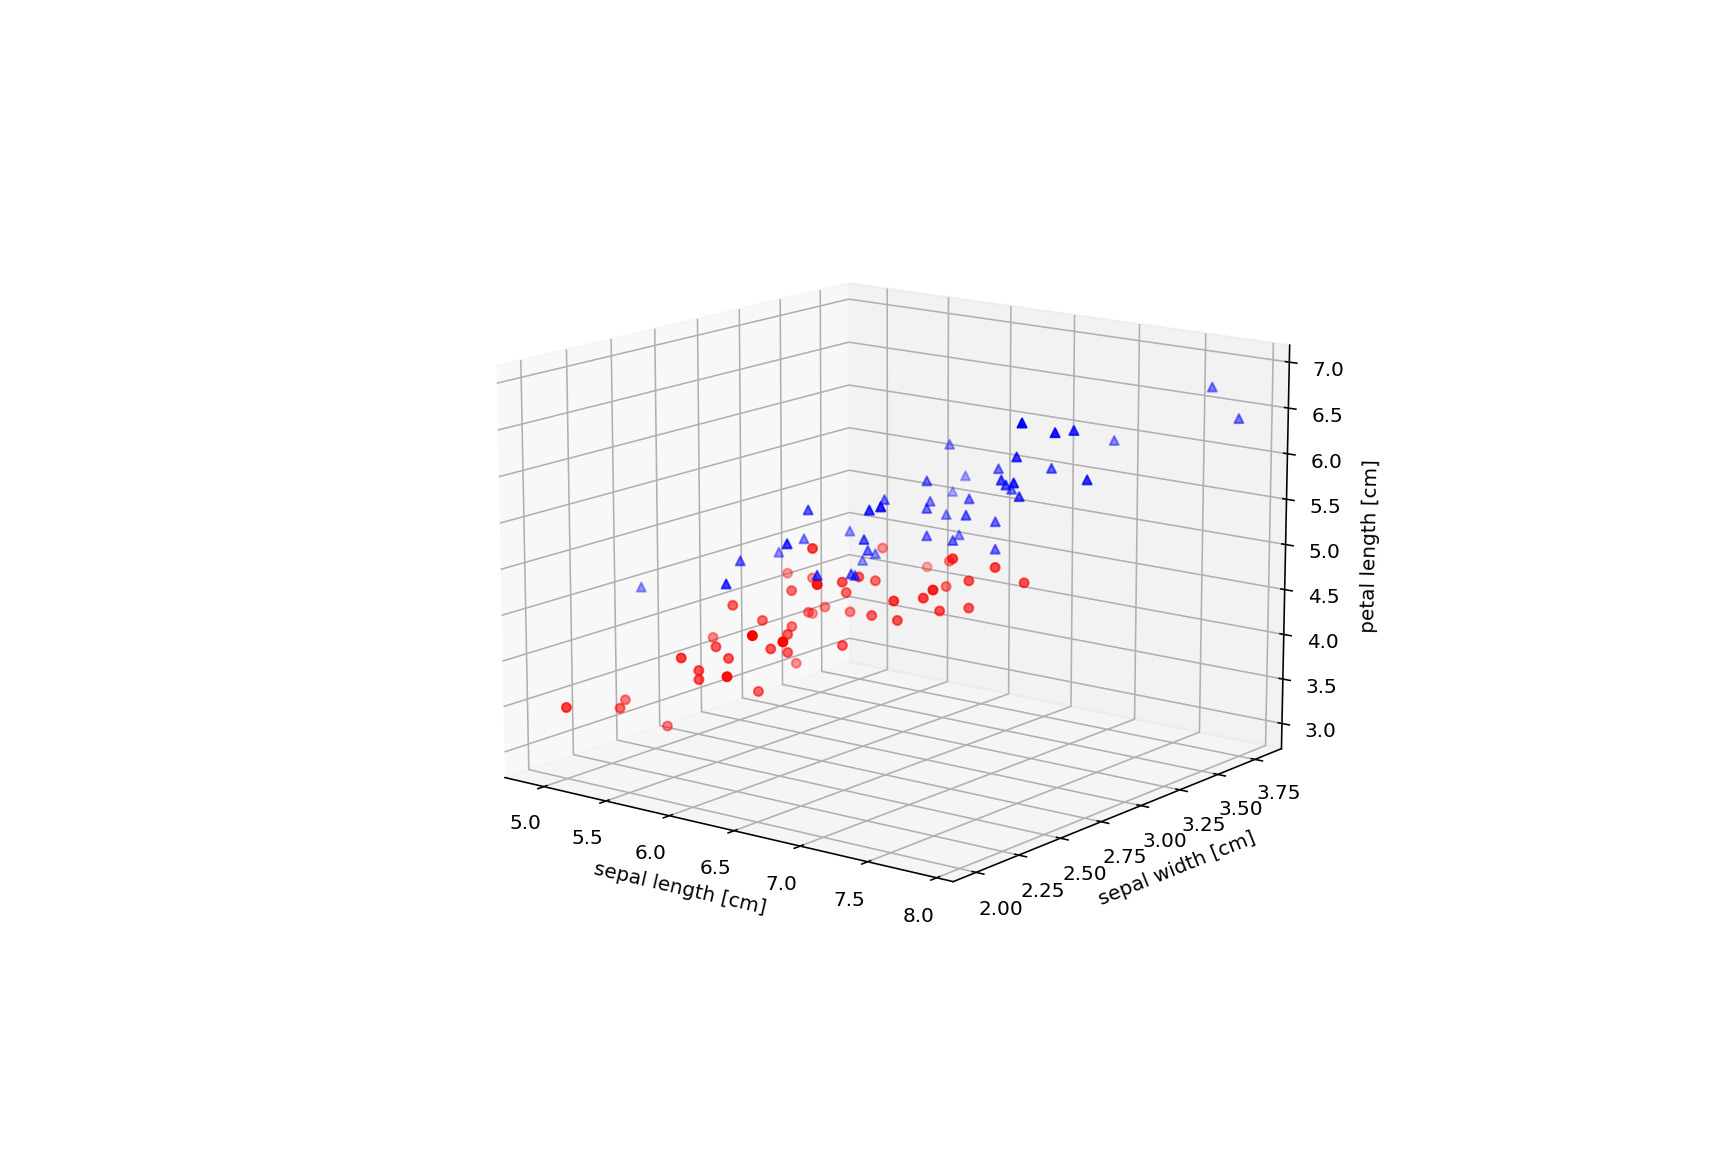

Blue = virginica 
Red = versicolor


In [47]:
%matplotlib notebook  
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# select versicolor and virginica
y = df.iloc[50:150, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)

# extract sepal length, sepal width, and petal length
X = df.iloc[50:150, [0, 1, 2]].values
xval = [X[:50, 0], X[50:100, 0]]
yval = [X[:50, 1], X[50:100, 1]]
zval = [X[:50, 2], X[50:100, 2]]

for c, m in [('r', 'o'), ('b', '^')]:
    if m=='o':
        xs = xval[0]
        ys = yval[0]
        zs = zval[0]
        ax.scatter(xs, ys, zs, c=c, marker=m)
    else:
        xs = xval[1]
        ys = yval[1]
        zs = zval[1]
        ax.scatter(xs, ys, zs, c=c, marker=m)
ax.set_xlabel('sepal length [cm]')
ax.set_ylabel('sepal width [cm]')
ax.set_zlabel('petal length [cm]')
print("Blue = virginica \nRed = versicolor")
plt.show()

# Improving gradient descent through feature scaling

In [48]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
X_std[:, 2] = (X[:, 2] - X[:, 2].mean()) / X[:, 2].std()

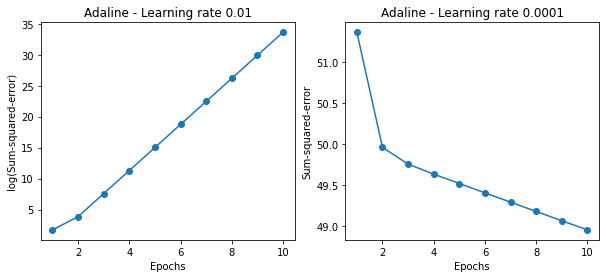

In [49]:
%matplotlib inline
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada.cost_) + 1), np.log10(ada.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

# Plotting the Iris data of 2 linearly non-seperable species (versicolor and virginica) using 4 features (sepal length, sepal width, petal length, and petal width)

<IPython.core.display.Javascript object>


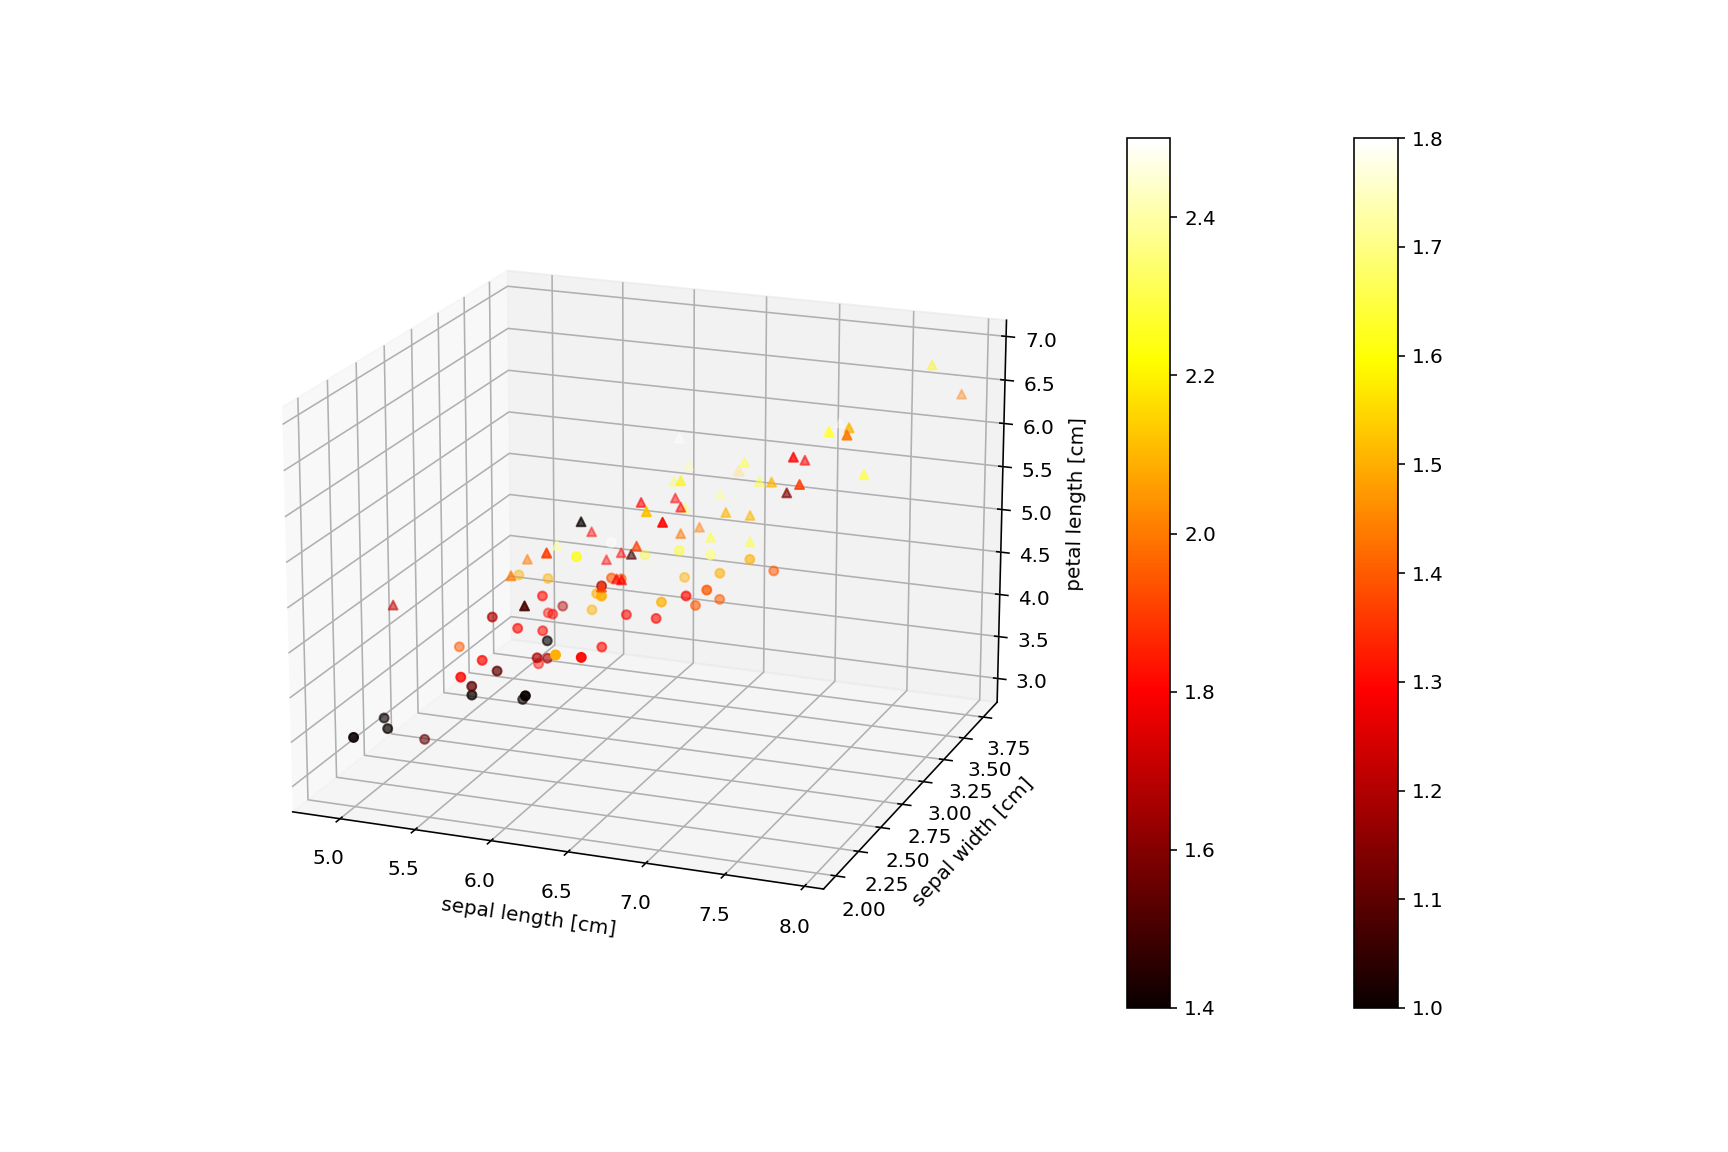

^ = virginica
o = versicolor
colorbar = petal width [cm]
left color bar = vriginica
right color bar = versicolor


In [50]:
%matplotlib notebook  
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# select versicolor and virginica
y = df.iloc[50:150, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)

# extract sepal length, sepal width, and petal length
X = df.iloc[50:150, [0, 1, 2, 3]].values
xval = [X[:50, 0], X[50:100, 0]]
yval = [X[:50, 1], X[50:100, 1]]
zval = [X[:50, 2], X[50:100, 2]]
z2val = [X[:50, 3], X[50:100, 3]]

for c, m in [('r', 'o'), ('b', '^')]:
    if m=='o':
        xs = xval[0]
        ys = yval[0]
        zs = zval[0]
        z2s = z2val[0]
        img = ax.scatter(xs, ys, zs, c=z2s, cmap=plt.hot(), marker=m, label='versicolor')
        fig.colorbar(img)
    else:
        xs = xval[1]
        ys = yval[1]
        zs = zval[1]
        z2s = z2val[1]
        img = ax.scatter(xs, ys, zs, c=z2s, cmap=plt.hot(), marker=m, label='virginica')
        fig.colorbar(img)
ax.set_xlabel('sepal length [cm]')
ax.set_ylabel('sepal width [cm]')
ax.set_zlabel('petal length [cm]')
print("^ = virginica\no = versicolor")
print("colorbar = petal width [cm]")
print("left color bar = vriginica")
print("right color bar = versicolor")
plt.show()

# Improving gradient descent through feature scaling

In [51]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
X_std[:, 2] = (X[:, 2] - X[:, 2].mean()) / X[:, 2].std()
X_std[:, 3] = (X[:, 3] - X[:, 3].mean()) / X[:, 3].std()

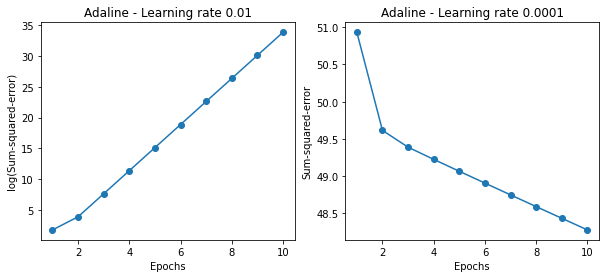

In [52]:
%matplotlib inline
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada.cost_) + 1), np.log10(ada.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

# Comparison of results between perceptron and adaline

## Perceptron is not able to work with linearly non-seperable classes while adaline can. We can see this in the No. of epochs vs Updates graphs of linearly non-seperable data using perceptron. The no. of updates value never goes to zero even after 100 epochs in perceptron. While, in case of adaline, it does a pretty good job. Although even adaline can't clearly seperate the non-seperable classes but the updates stops after a certain no. of epochs.

## Also, the learning rate in perceptron doesn't matter while in case of adaline, it does. 